In [1]:
# 各ライブラリのインストール
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import statistics

In [2]:
# 個体クラスの定義
class Indivisual():
    def __init__(self, x):
        self.sex = np.random.choice(["m", "f"], p=[x, (1-x)])
        self.sexratio = x
        self.age = 0
        
    def death(self): # 死亡処理(0が死，1が生を意味する)
        if self.age == 10: # 10歳で確実に死ぬ
            return 0
        else:
            return np.random.choice([0, 1], p=[0.1, 0.9]) # 1/10の確率で死ぬ
    
    # 次世代の性比強度の決定
    def __nextGen(self, female, male):
        ave = 0
        nextgen = -1
    
        # 両親の性比強度の平均
        ave = (female+male)/2
        # 平均ave、分散0.1の正規分布から次世代の値を決定
        while nextgen < 0 or nextgen >= 1:
            nextgen = np.random.normal(ave, 0.1)
    
        return nextgen
        
    def spawn(self, male): # 卵を1年で10個産む
        egg = []
        for i in range(10):
            egg.append(self.__nextGen(self.sexratio, male))
            
        return egg
    
    def aging(self): # 歳を取る
        self.age = self.age + 1

In [3]:
# シミュレーションクラスの定義
class Simulation():
    def __init__(self, x, firstsize, limit):
        self.population = self.__initialize(x, firstsize)
        self.limit = limit

    # 初期集団をつくる
    def __initialize(self, x, firstsize):
        population = []

        for i in range(firstsize):
            population.append(Indivisual(x))
        
        return population

    # 集団内の交尾
    def __copulation(self):
        male_population = []
        female_population = []
        newgen = []
        # 計算量抑制のため，集団の1/3のみを選出，そこから交尾可能か探る
        selected_population = random.sample(self.population, round(len(self.population)/3))
    
        for i in range(len(selected_population)):
            if selected_population[i].sex == "f":
                female_population.append(selected_population[i])
            else:
                male_population.append(selected_population[i])
        if len(female_population) >= len(male_population):
            cop_i = len(male_population)
        else:
            cop_i = len(female_population)
        
        for i in range(cop_i): # 交尾させる雌雄の抽出と交配
            cop_female = female_population.pop(random.randrange(len(female_population)))
            cop_male = male_population.pop(random.randrange(len(male_population)))
            newgen.append(cop_female.spawn(cop_male.sexratio))
        
        return newgen

    # 人口抑制プログラム
    def __populationControl(self, population, limit):
        while len(population) > int(limit):
            index = random.randrange(len(population))
            del population[index]

    # 1世代のシミュレーションを実行
    def run_one_episode(self):
        for popu in self.population[:]: 
            popu.aging() # 歳を取らせてる
            if popu.death() == 0: # もし死んでいたら削除
                index = self.population.index(popu)
                del self.population[index]
        newegg = self.__copulation()
        if newegg is not None:
            for i in range(len(newegg)):
                for j in range(10): 
                    self.population.append(Indivisual(newegg[i][j]))

        self.__populationControl(self.population, self.limit)


In [4]:
# main処理
def main(x, firstsize, limit, iteration):
    t = []
    summarize = []
    simulation = Simulation(x, firstsize, limit)

    for i in range(int(iteration/10)):
        a = 0
        t.append(a+(i*10))

    for i in tqdm(range(iteration)):
        simulation.run_one_episode()

        if i in t:
            male_size = []
            for j in range(len(simulation.population)):
                if simulation.population[j].sex == 'm':
                    male_size.append(simulation.population[j])
            summarize.append(len(male_size)/len(simulation.population))

    
    plt.plot(t, summarize)
    plt.title('sex ratio')
    plt.xlabel('Generations')
    plt.grid(True)

100%|██████████| 100/100 [00:00<00:00, 103.93it/s]


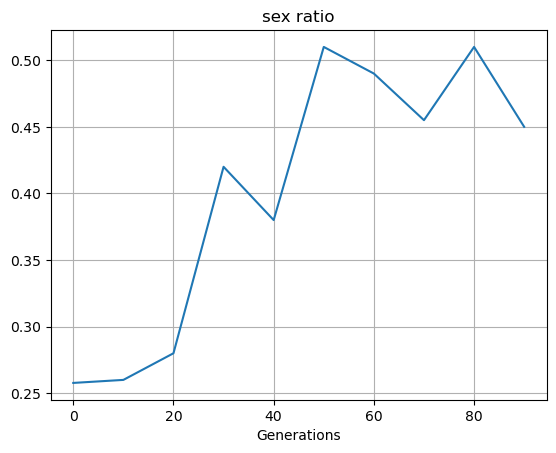

In [5]:
# 初期性比0.2、初期集団サイズ50、最大集団サイズ200、ループ回数100
main(0.2, 50, 200, 100)

100%|██████████| 1000/1000 [00:27<00:00, 36.74it/s]


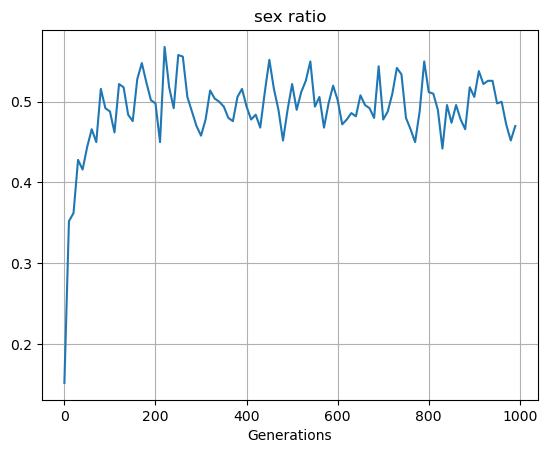

In [6]:
# 初期性比0.2、初期集団サイズ50、最大集団サイズ500、ループ回数1000
main(0.2, 50, 500, 1000)